In [1]:
# Trading Algorithm Setup
import yfinance as yf          # Get stock data
import pandas as pd            # Handle data tables
import numpy as np             # Math calculations
import matplotlib.pyplot as plt # Create charts
import seaborn as sns          # Beautiful charts
from datetime import datetime, timedelta

# Make charts look professional
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("🚀 Trading Lab Ready!")
print(f"📅 Today: {datetime.now().strftime('%Y-%m-%d')}")

🚀 Trading Lab Ready!
📅 Today: 2025-06-15


In [2]:
# Download stock data
ticker = "SPY"  # S&P 500 ETF
stock = yf.Ticker(ticker)
data = stock.history(period="3mo")  # Last 3 months

# Display first few rows
print(f"📊 {ticker} Data (Last 3 months)")
print(f"Total days: {len(data)}")
data.head()  # Shows first 5 rows

📊 SPY Data (Last 3 months)
Total days: 64


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2025-03-14 00:00:00-04:00,554.442092,562.138970,549.835953,561.122009,62660300,0.0,0.0,0.0
2025-03-17 00:00:00-04:00,561.102066,568.001355,560.663383,565.449036,49008700,0.0,0.0,0.0
2025-03-18 00:00:00-04:00,563.106034,563.325406,557.383259,559.337402,66041400,0.0,0.0,0.0
2025-03-19 00:00:00-04:00,561.141986,569.237628,559.945573,565.429077,66556000,0.0,0.0,0.0
2025-03-20 00:00:00-04:00,561.640511,568.858788,560.912659,563.794006,62958200,0.0,0.0,0.0


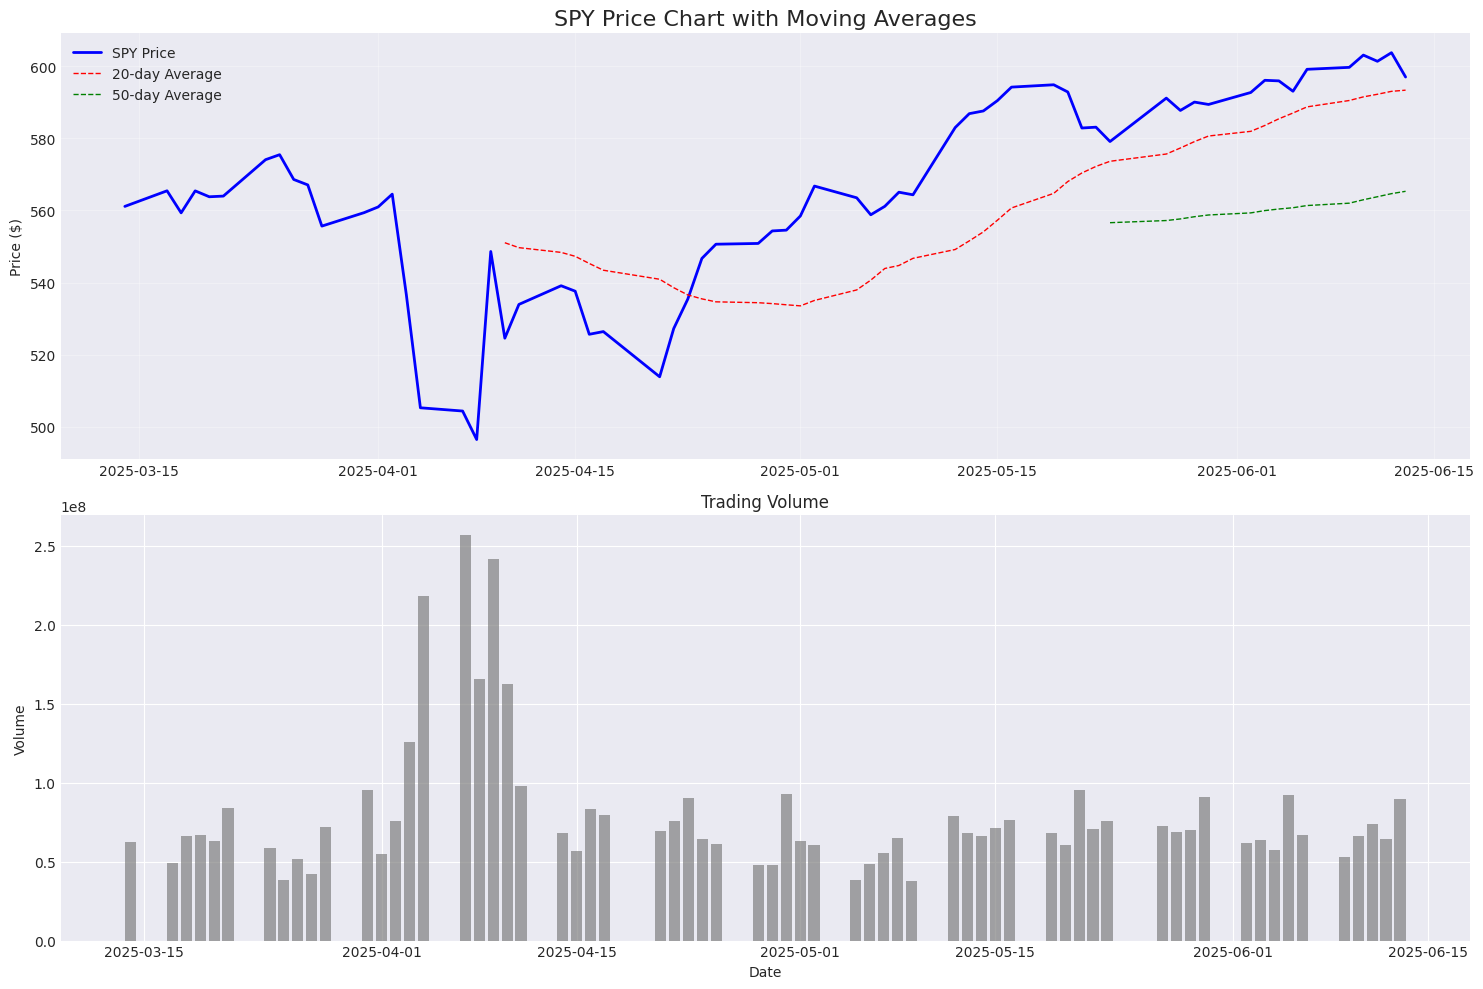


📈 SPY Quick Stats:
Current Price: $597.00
3-Month High: $605.06
3-Month Low: $481.80
3-Month Return: 6.39%


In [3]:
# Create professional price chart
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

# Price chart with moving averages
ax1.plot(data.index, data['Close'], label='SPY Price', linewidth=2, color='blue')
ax1.plot(data.index, data['Close'].rolling(20).mean(), 
         label='20-day Average', linewidth=1, color='red', linestyle='--')
ax1.plot(data.index, data['Close'].rolling(50).mean(), 
         label='50-day Average', linewidth=1, color='green', linestyle='--')

ax1.set_title(f'{ticker} Price Chart with Moving Averages', fontsize=16)
ax1.set_ylabel('Price ($)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Volume chart
ax2.bar(data.index, data['Volume'], alpha=0.7, color='gray')
ax2.set_title('Trading Volume')
ax2.set_ylabel('Volume')
ax2.set_xlabel('Date')

plt.tight_layout()
plt.show()

# Quick statistics
print(f"\n📈 {ticker} Quick Stats:")
print(f"Current Price: ${data['Close'].iloc[-1]:.2f}")
print(f"3-Month High: ${data['High'].max():.2f}")
print(f"3-Month Low: ${data['Low'].min():.2f}")
print(f"3-Month Return: {((data['Close'].iloc[-1] / data['Close'].iloc[0]) - 1) * 100:.2f}%")

/tmp/ipykernel_11762/1084088200.py:13: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  signals['signal'][short_window:] = np.where(
/tmp/ipykernel_11762/1084088200.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

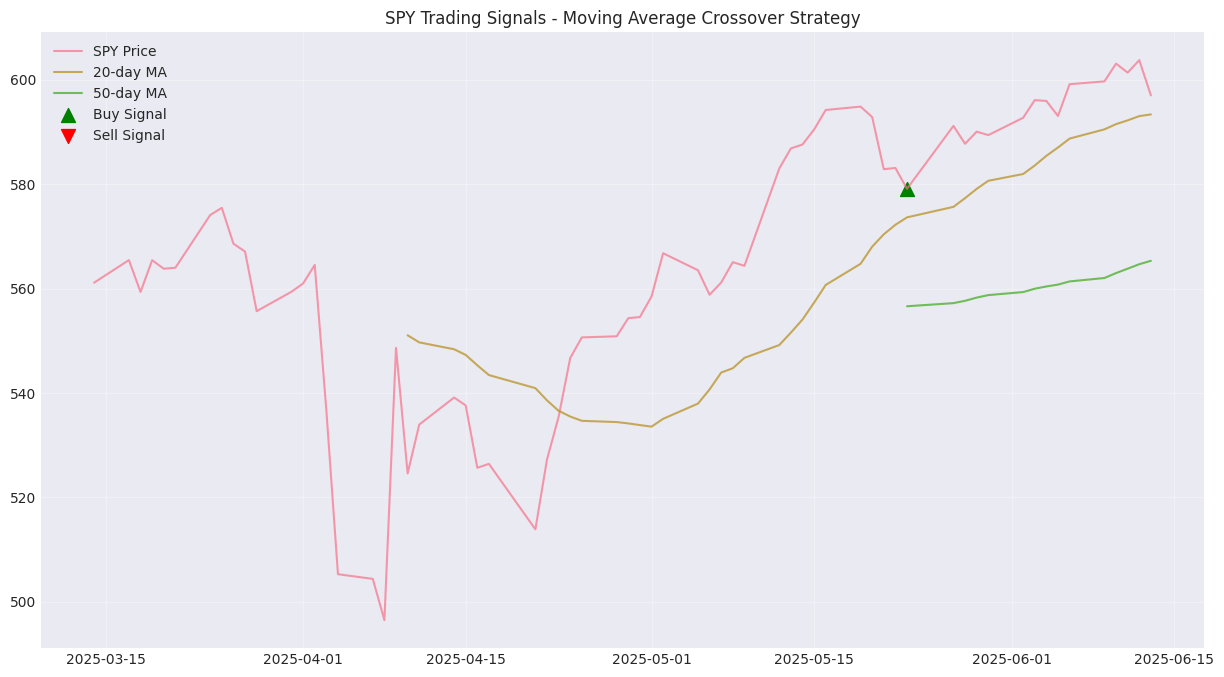

🎯 Strategy Results:
Buy signals: 1
Sell signals: 0


In [4]:
# Simple trading strategy: Moving Average Crossover
def generate_trading_signals(data, short_window=20, long_window=50):
    """
    Generate buy/sell signals when short MA crosses above/below long MA
    """
    signals = pd.DataFrame(index=data.index)
    signals['price'] = data['Close']
    signals['short_ma'] = data['Close'].rolling(window=short_window).mean()
    signals['long_ma'] = data['Close'].rolling(window=long_window).mean()
    
    # Generate signals (1 = Buy, 0 = Hold, -1 = Sell)
    signals['signal'] = 0
    signals['signal'][short_window:] = np.where(
        signals['short_ma'][short_window:] > signals['long_ma'][short_window:], 1, 0
    )
    signals['positions'] = signals['signal'].diff()
    
    return signals

# Generate signals for SPY
signals = generate_trading_signals(data)

# Plot signals
plt.figure(figsize=(15, 8))
plt.plot(signals.index, signals['price'], label='SPY Price', alpha=0.7)
plt.plot(signals.index, signals['short_ma'], label='20-day MA', alpha=0.8)
plt.plot(signals.index, signals['long_ma'], label='50-day MA', alpha=0.8)

# Mark buy and sell points
buy_signals = signals[signals['positions'] == 1]
sell_signals = signals[signals['positions'] == -1]

plt.scatter(buy_signals.index, buy_signals['price'], 
           color='green', marker='^', s=100, label='Buy Signal')
plt.scatter(sell_signals.index, sell_signals['price'], 
           color='red', marker='v', s=100, label='Sell Signal')

plt.title('SPY Trading Signals - Moving Average Crossover Strategy')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"🎯 Strategy Results:")
print(f"Buy signals: {len(buy_signals)}")
print(f"Sell signals: {len(sell_signals)}")

In [5]:
# Daily market update
tickers = ['SPY', 'QQQ', 'IWM', 'GLD', 'TLT']
today_data = {}

print("📊 Today's Market Snapshot:")
print("=" * 40)

for ticker in tickers:
    stock = yf.Ticker(ticker)
    hist = stock.history(period="2d")  # Last 2 days
    current_price = hist['Close'].iloc[-1]
    previous_price = hist['Close'].iloc[-2]
    change = ((current_price - previous_price) / previous_price) * 100
    
    print(f"{ticker}: ${current_price:.2f} ({change:+.2f}%)")
    today_data[ticker] = hist

print("\n🚨 Check for trading opportunities...")

📊 Today's Market Snapshot:
SPY: $597.00 (-1.12%)
QQQ: $526.96 (-1.26%)
IWM: $208.89 (-1.83%)
GLD: $316.29 (+1.31%)
TLT: $86.33 (-0.96%)

🚨 Check for trading opportunities...
